In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [236]:
print(tf.__version__)

2.2.0


In [237]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-14 01:56:58--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.59MB/s    in 53s     

2020-05-14 01:57:52 (5.83 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()



In [239]:
!pip install split-folders
import split_folders
import os
import sys
import shutil
shutil.rmtree('/tmp/rockpaperscissors/rps-cv-images')

split_folders.ratio('/tmp/rockpaperscissors/', output='/tmp/datasets', seed=1337, ratio=(.8, .1, .1))

Copying files: 2188 files [00:00, 4186.89 files/s]


In [240]:
os.listdir('/tmp/datasets/train') 

['paper', 'rock', 'scissors']

In [241]:
os.listdir('/tmp/datasets/val')

['paper', 'rock', 'scissors']

In [0]:
base_dir = '/tmp/datasets'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# membuat direktori paper pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')

# membuat direktori rock pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')

# membuat direktori scissors pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')

# membuat direktori ruangan paper pada direktori data validasi
validation_paper_dir = os.path.join(validation_dir, 'paper')

# membuat direktori rock berantakan pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')

# membuat direktori ruangan scissors pada direktori data validasi
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [0]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [244]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),  
        batch_size=4,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 218 images belonging to 3 classes.


In [0]:
from keras.layers import Dropout

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
     ])

In [246]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
dropout_5 (Dropout)          (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)      

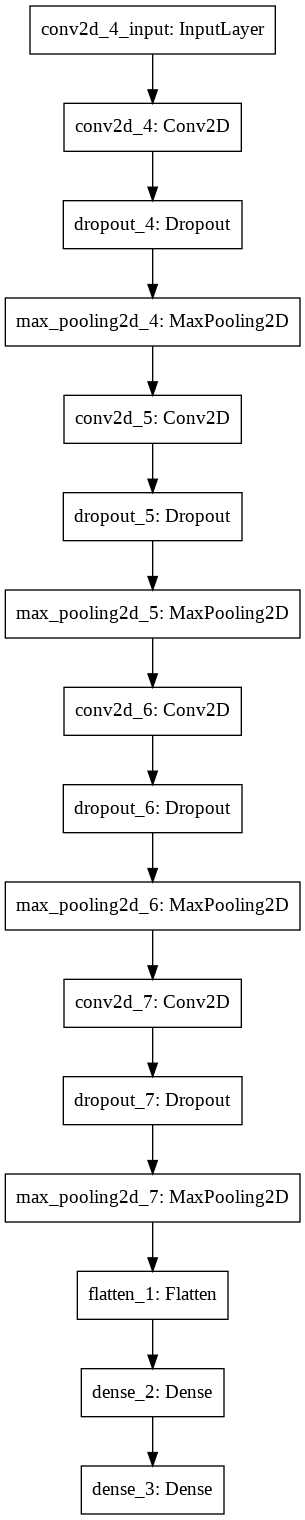

In [247]:
import pydot
keras.utils.plot_model(model)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Nadam(learning_rate=0.0001),
              metrics=['accuracy'])

In [249]:
history=model.fit(
      train_generator,
      steps_per_epoch=25, 
      epochs=50,
      validation_data=validation_generator, 
      validation_steps=5, 
      verbose=1)

Epoch 1/50
25/25 [==============================] - 1s 45ms/step - loss: 1.1011 - accuracy: 0.3700 - val_loss: 1.1210 - val_accuracy: 0.2500
Epoch 2/50
25/25 [==============================] - 1s 40ms/step - loss: 1.0910 - accuracy: 0.4200 - val_loss: 1.0744 - val_accuracy: 0.4000
Epoch 3/50
25/25 [==============================] - 1s 39ms/step - loss: 1.0396 - accuracy: 0.4300 - val_loss: 1.0138 - val_accuracy: 0.6500
Epoch 4/50
25/25 [==============================] - 1s 40ms/step - loss: 0.9659 - accuracy: 0.4700 - val_loss: 0.9933 - val_accuracy: 0.7500
Epoch 5/50
25/25 [==============================] - 1s 39ms/step - loss: 0.9850 - accuracy: 0.5500 - val_loss: 0.9910 - val_accuracy: 0.5500
Epoch 6/50
25/25 [==============================] - 1s 40ms/step - loss: 0.9406 - accuracy: 0.6300 - val_loss: 0.9802 - val_accuracy: 0.4500
Epoch 7/50
25/25 [==============================] - 1s 39ms/step - loss: 0.8536 - accuracy: 0.6700 - val_loss: 0.9347 - val_accuracy: 0.5500
Epoch 8/50
25

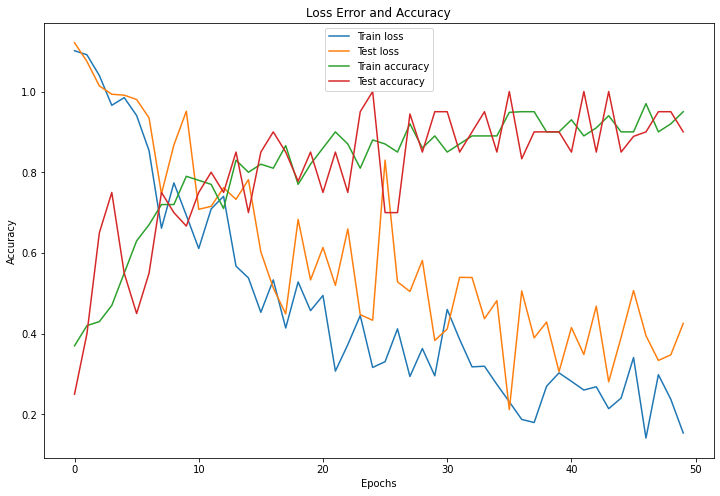

In [250]:
#digunakan ketika menghapus model
#from tensorflow import keras
#del model
#keras.backend.clear_session()

import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(12,8))
plt.title('Loss Error and Accuracy')
ax.plot(history.history['loss'], label='Train loss')
ax.plot(history.history['val_loss'], label='Test loss')
ax.plot(history.history['accuracy'], label='Train accuracy')
ax.plot(history.history['val_accuracy'], label='Test accuracy')
plt.legend(loc='upper center')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
plt.show()

Saving 01dM3ewPIsnBICu1.png to 01dM3ewPIsnBICu1.png
01dM3ewPIsnBICu1.png
Rock


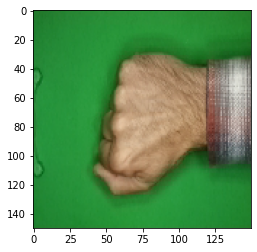

In [252]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][1]==1.0:
    print('Rock')
  elif classes[0][0]==1.0:
    print('Paper')
  elif classes[0][2]==1.0:
    print('Scissor')
  else:
    print('Not Recognized')